In [105]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,log_loss
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = 15,8

In [20]:
train_df = pd.read_csv('TrainingData.csv',names=['Time','Feature1','Feature2','Feature3','Feature4','Feature5','Target'])#,parse_dates=['Time'])

In [21]:
train_df.dtypes

Time         object
Feature1    float64
Feature2    float64
Feature3    float64
Feature4    float64
Feature5      int64
Target        int64
dtype: object

In [22]:
train_df.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5,Target
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,1.390335,1.391464,1.389289,1.390392,7387.353569,0.586391
std,0.020315,0.020468,0.020138,0.020292,3716.737421,0.780932
min,1.342860,1.343940,1.342590,1.342790,501.000000,0.000000
25%,1.380255,1.381330,1.379255,1.380285,4594.000000,0.000000
50%,1.392120,1.393390,1.390750,1.392150,6886.000000,0.000000
75%,1.403200,1.404455,1.402155,1.403260,9904.000000,1.000000
max,1.431150,1.434460,1.428560,1.431150,24535.000000,2.000000


In [28]:
#train_df.Time.astype(np.int32)

In [25]:
#train_df.Time = train_df.Time.astype(np.timedelta64)

In [35]:
train_df.Time = train_df.Time.apply(lambda x: np.float32(x.replace(':','.')),convert_dtype=True)

In [36]:
#train_df.Time.dtype

dtype('float64')

In [39]:
train_df['Sin'] = np.sin(2*np.pi*train_df.Time/24.0)
train_df['Cos'] = np.cos(2*np.pi*train_df.Time/24.0)

In [40]:
train_df.head()

,Time,Feature1,Feature2,Feature3,Feature4,Feature5,Target,Sin,Cos
0,18.0,1.34347,1.34525,1.34347,1.34492,7321,0,-1.000000,-1.836970e-16
1,19.0,1.34492,1.34532,1.34425,1.34468,5638,0,-0.965926,2.588190e-01
2,20.0,1.34469,1.34536,1.34445,1.34515,5185,2,-0.866025,5.000000e-01
3,21.0,1.34513,1.34518,1.34393,1.34439,4358,0,-0.707107,7.071068e-01
4,22.0,1.34439,1.34448,1.34386,1.34421,4217,0,-0.500000,8.660254e-01


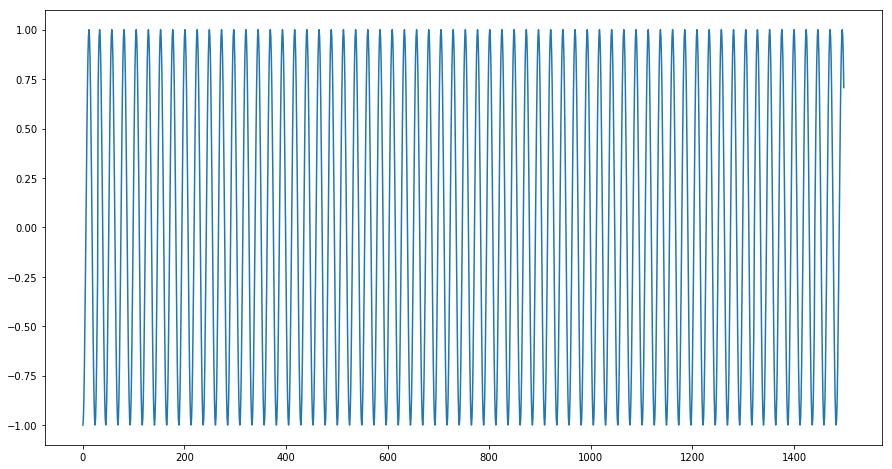

In [42]:
train_df.Sin.plot()

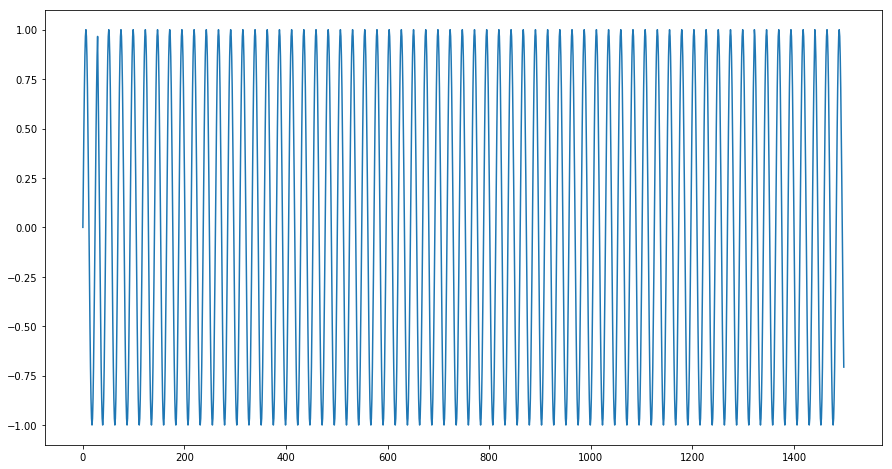

In [43]:
train_df.Cos.plot()

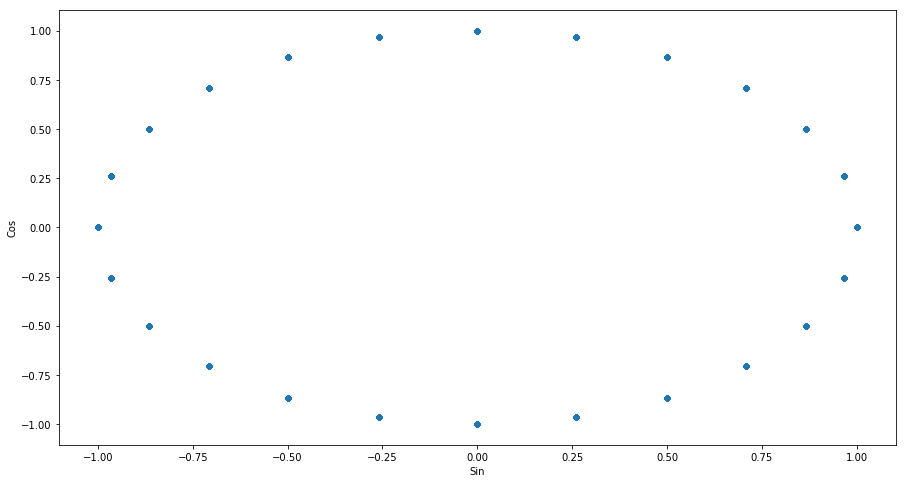

In [44]:
train_df.plot('Sin','Cos',kind='scatter')

In [55]:
print(train_df.columns.values)

Y = train_df.Target.astype(np.float32)
X = train_df[['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Sin','Cos']].values.astype(np.float32)

['Time' 'Feature1' 'Feature2' 'Feature3' 'Feature4' 'Feature5' 'Target'
 'Sin' 'Cos']


In [56]:
X[:5], Y[:5]

(array([[ 1.3434700e+00,  1.3452500e+00,  1.3434700e+00,  1.3449200e+00,
          7.3210000e+03, -1.0000000e+00, -1.8369701e-16],
        [ 1.3449200e+00,  1.3453200e+00,  1.3442500e+00,  1.3446800e+00,
          5.6380000e+03, -9.6592581e-01,  2.5881904e-01],
        [ 1.3446900e+00,  1.3453600e+00,  1.3444500e+00,  1.3451500e+00,
          5.1850000e+03, -8.6602539e-01,  5.0000000e-01],
        [ 1.3451300e+00,  1.3451800e+00,  1.3439300e+00,  1.3443900e+00,
          4.3580000e+03, -7.0710677e-01,  7.0710677e-01],
        [ 1.3443900e+00,  1.3444800e+00,  1.3438600e+00,  1.3442100e+00,
          4.2170000e+03, -5.0000000e-01,  8.6602539e-01]], dtype=float32),
 0    0.0
 1    0.0
 2    2.0
 3    0.0
 4    0.0
 Name: Target, dtype: float32)

In [59]:
train_df.head(5)

,Time,Feature1,Feature2,Feature3,Feature4,Feature5,Target,Sin,Cos
0,18.0,1.34347,1.34525,1.34347,1.34492,7321,0,-1.000000,-1.836970e-16
1,19.0,1.34492,1.34532,1.34425,1.34468,5638,0,-0.965926,2.588190e-01
2,20.0,1.34469,1.34536,1.34445,1.34515,5185,2,-0.866025,5.000000e-01
3,21.0,1.34513,1.34518,1.34393,1.34439,4358,0,-0.707107,7.071068e-01
4,22.0,1.34439,1.34448,1.34386,1.34421,4217,0,-0.500000,8.660254e-01


In [65]:
X.shape

(1499, 7)

In [82]:
X_train,X_test_final,Y_train,Y_test_final = train_test_split(X,Y,train_size=.92,test_size=.08,stratify=Y)

In [83]:
X_train.shape,X_test_final.shape,Y_train.shape,Y_test_final.shape

((1379, 7), (120, 7), (1379,), (120,))

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,train_size=.92,test_size=.08,stratify=Y_train)

In [85]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1268, 7), (111, 7), (1268,), (111,))

In [87]:
rbs = RobustScaler()
X_train = rbs.fit_transform(X_train)
X_test = rbs.transform(X_test)
X_test_final = rbs.transform(X_test_final)

In [101]:
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train,Y_train)
print(knc.score(X_test,Y_test))
print(knc.score(X_test_final,Y_test_final))

0.5855855855855856
0.575


In [102]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
print(lr.score(X_test,Y_test))
print(lr.score(X_test_final,Y_test_final))

0.5945945945945946
0.6


In [157]:
mlpc = MLPClassifier(hidden_layer_sizes=(64,128,256,512,1024,2048),
                     solver='sgd',
                     learning_rate='adaptive',
                     learning_rate_init=.01,
                     batch_size=4,
                     verbose=True,
                     shuffle=False,
                     max_iter=200
                    )

In [158]:
mlpc.fit(X_train,Y_train)

Iteration 1, loss = 0.99735476
Iteration 2, loss = 0.98503842
Iteration 3, loss = 0.98025848
Iteration 4, loss = 0.98106812
Iteration 5, loss = 0.97422960
Iteration 6, loss = 0.97760249
Iteration 7, loss = 0.97493461
Iteration 8, loss = 0.97695206
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.002000
Iteration 9, loss = 0.96415791
Iteration 10, loss = 0.95925023
Iteration 11, loss = 0.95665685
Iteration 12, loss = 0.95525821
Iteration 13, loss = 0.95474042
Iteration 14, loss = 0.95305056
Iteration 15, loss = 0.95170137
Iteration 16, loss = 0.95130143
Iteration 17, loss = 0.95043319
Iteration 18, loss = 0.94944740
Iteration 19, loss = 0.94897081
Iteration 20, loss = 0.94851840
Iteration 21, loss = 0.94808883
Iteration 22, loss = 0.94722213
Iteration 23, loss = 0.94493069
Iteration 24, loss = 0.94658314
Iteration 25, loss = 0.94506806
Iteration 26, loss = 0.94429860
Iteration 27, loss = 0.94358756
Iteration 28, loss = 0.9417546

MLPClassifier(activation='relu', alpha=0.0001, batch_size=4, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 128, 256, 512, 1024, 2048),
       learning_rate='adaptive', learning_rate_init=0.01, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=False, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [159]:
mlpc.score(X_test,Y_test)

0.5945945945945946

In [160]:
mlpc.score(X_test_final,Y_test_final)

0.5666666666666667